<a href="https://colab.research.google.com/github/Graceyong1020/AndroidPro/blob/master/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

# Assuming your extracted data is in 'brain_tumor_dataset' under 'archive'
folder = '/content/drive/My Drive/archive/brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)  # Use os.path.join for paths
    destination = os.path.join(folder, "Y_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the yes dir")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All files are renamed in the yes dir


Data Preparation

In [2]:
folder = '/content/drive/My Drive/archive/brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)  # Use os.path.join for paths
    destination = os.path.join(folder, "N_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the no dir")

All files are renamed in the no dir


In [4]:
#EDA(Exploratory Data Analysis)

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'brain_tumor_dataset' is in 'archive' under 'My Drive'
yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes'
no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'

listyes = os.listdir(yes_path)  # Use full path
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(no_path)   # Use full path
number_files_no = len(listno)
print(number_files_no)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
815
319


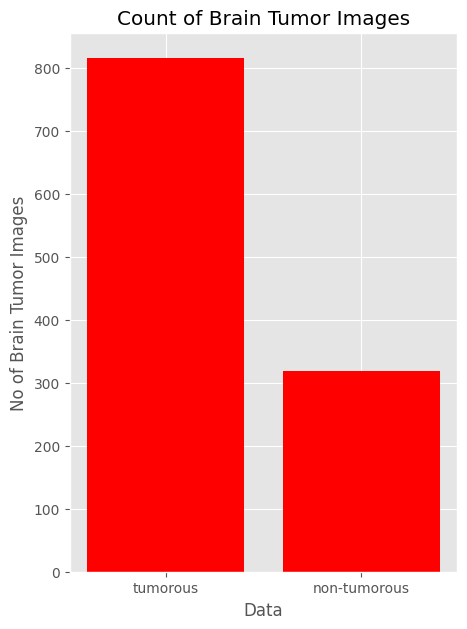

In [4]:
#plot

data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = list(data.keys()) # Convert typex to a list
values = list(data.values()) # Convert values to a list

fig = plt.figure(figsize = (5,7))

plt.bar(typex, values, color="red")
plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [5]:
#Data Agumentation
# 155(61%), 98(39%)
#imbalance

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout  # Corrected to Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [6]:
import os
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )
    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)
        image = cv2.imread(image_path)
        if image is not None:  # Check if image loaded successfully
            image = image.reshape((1,) + image.shape)
            save_prefix = 'aug_' + filename[:-4]
            i = 0
            for batch in datagen.flow(
                x=image,
                batch_size=1,
                save_to_dir=save_to_dir,
                save_prefix=save_prefix,
                save_format='jpg'  # or 'png' if your images are PNGs
            ):
                i += 1
                if i > n_generated_samples:
                    break
        else:
            print(f"Failed to load image: {image_path}")

start_time = time.time()

# Define paths
augmented_data_path = '/content/drive/My Drive/archive/augmented_data/'
yes_path = os.path.join(augmented_data_path, 'yes')  # Destination for augmented 'yes' images
no_path = os.path.join(augmented_data_path, 'no')   # Destination for augmented 'no' images

original_yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes' # Source of original 'yes' images
original_no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'  # Source of original 'no' images

# Create destination directories if they don't exist
os.makedirs(yes_path, exist_ok=True)
os.makedirs(no_path, exist_ok=True)

# Generate augmented images
augmented_data(file_dir=original_yes_path, n_generated_samples=6, save_to_dir=yes_path)
augmented_data(file_dir=original_no_path, n_generated_samples=9, save_to_dir=no_path)

end_time = time.time()
execution_time = (end_time - start_time)
print(execution_time)

KeyboardInterrupt: 

In [7]:
def data_summary(main_path):
  import os
  yes_path = os.path.join(main_path, 'yes')
  no_path = os.path.join(main_path, 'no')

  n_pos = len(os.listdir(yes_path))
  n_neg = len(os.listdir(no_path))
  n = n_pos + n_neg
  pos_per = (n_pos * 100.0) / n
  neg_per = (n_neg * 100.0) / n

  print(f"Number of sample: {n}")
  print(f"{n_pos}Percentage of positive samples: {pos_per} %")
  print(f"{n_neg}Percentage of negative samples: {neg_per} %")




In [8]:
augmented_data_path = '/content/drive/My Drive/archive/augmented_data/'
data_summary(augmented_data_path)

Number of sample: 69870
38490Percentage of positive samples: 55.08802060970373 %
31380Percentage of negative samples: 44.91197939029627 %


In [9]:
yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes'
no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'

listyes = os.listdir(yes_path)  # Use full path
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(no_path)   # Use full path
number_files_no = len(listno)
print(number_files_no)

815
319


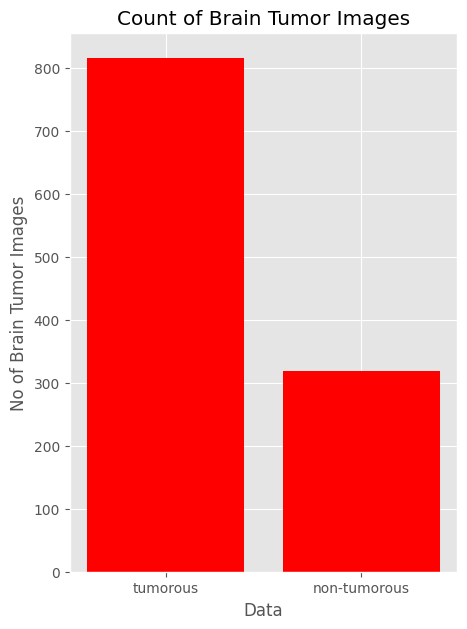

In [10]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = list(data.keys()) # Convert typex to a list
values = list(data.values()) # Convert values to a list

fig = plt.figure(figsize = (5,7))

plt.bar(typex, values, color="red")
plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [11]:
#Data preprocessing

# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

import imutils
def crop_brain_tumor(image, plot=False):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  gray = cv2.GaussianBlur(gray, (5,5), 0)

  thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
  thresh = cv2.erode(thresh, None, iterations=2)
  thresh = cv2.dilate(thresh, None, iterations=2)

  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)

  extLeft = tuple(c[c[:,:,0].argmin()][0])
  extRight = tuple(c[c[:,:,0].argmax()][0])
  extTop = tuple(c[c[:,:,1].argmin()][0])
  extBot = tuple(c[c[:,:,1].argmax()][0])

  new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

  if plot:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image)

    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image)

    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Cropped Image')

    plt.show()
  return new_image





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(359, 297, 3)


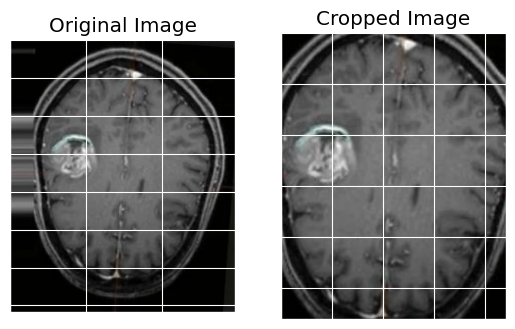

In [12]:
import cv2
from google.colab import drive
drive.mount('/content/drive')


img_path = '/content/drive/My Drive/archive/augmented_data/yes/aug_Y_1084_0_7780.jpg'
img = cv2.imread(img_path)

if img is not None:
    print(img.shape)  # Print the image shape
    crop_brain_tumor(img, True)
else:
    print("Error: Could not load image. Please check the path and file.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(257, 196, 3)


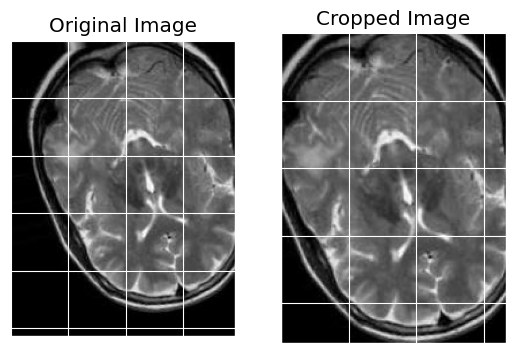

In [13]:
import cv2
from google.colab import drive
drive.mount('/content/drive')


img_path = '/content/drive/My Drive/archive/augmented_data/no/aug_N_1000_0_9766.jpg'
img = cv2.imread(img_path)

if img is not None:
    print(img.shape)  # Print the image shape
    crop_brain_tumor(img, True)
else:
    print("Error: Could not load image. Please check the path and file.")

In [14]:
# image loading
from sklearn.utils import shuffle
import cv2
def load_data(dir_list, image_size):
  X = []
  y = []
  image_width, image_height = image_size

  for directory in dir_list:
    for filename in os.listdir(directory):
      image = cv2.imread(directory + '/' + filename)
      image = crop_brain_tumor(image, plot=False)
      image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC) # make same size
      image = image / 255.
      X.append(image)
      if directory[-3:] == 'yes':
        y.append([1])
      else:
        y.append([0])
  X = np.array(X)
  y = np.array(y)

  X, y = shuffle(X, y)
  print(f'Number of examples is: {len(X)}')
  print(f'X shape is: {X.shape}')
  print(f'y shape is: {y.shape}')
  return X, y


In [ ]:
augmented_path = '/content/drive/My Drive/archive/augmented_data/'
augmented_yes = os.path.join(augmented_path, 'yes')
augmented_no = os.path.join(augmented_path, 'no')

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X,y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))


In [15]:
def plot_sample_images(X, y, n=50):
  for label in [0,1]:
    images = X[np.argwhere(y == label)]
    n_images = images[:n]

    columns_n = 10
    rows_n = int(n/columns_n)

    plt.figure(figsize=(20, 10))
    i = 1
    for image in n_images:
      plt.subplot(rows_n, columns_n, i+1)
      plt.imshow(n_images[0])

      plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)

      i += 1
    label_to_str = lambda label: "Yes" if label == 1 else "No"
    plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
    plt.show()

In [ ]:
plot_sample_images(X, y)

In [18]:
#Data Spliting
# Train
# Test
# Validation
if not os.path.isdir('/content/drive/My Drive/archive/tumorous_and_non_tumorous'):
  base_dir = 'tumorous_and_non_tumorous'
  os.mkdir(base_dir)